<a href="https://www.analytiksinc.com">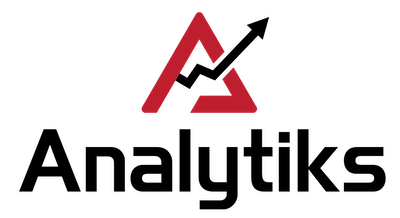</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# Exercise: Cross Validation & Pipeline Exercise

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

## Load the Dataset

<b>Dataset:</b><i> diabetes.csv</i>

In [5]:
df = pd.read_csv('diabetes.csv')
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Identify Target and Predictor Variables & Separate (X, y)

In [9]:
X = df.drop('Class',axis=1)
y=df['Class']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Build Pipeline with a Scaler then Gaussian Naive Bayes

In [16]:
scaler = StandardScaler()
gnb = GaussianNB()

In [35]:
model = Pipeline([('scaler',scaler),('gnb',gnb)])

In [38]:
model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [39]:
y_predict=model.predict(X_test)

In [43]:
model = Pipeline([('scaler',scaler),('gnb',gnb)])
predicted_class = cross_val_predict(model, X, y, cv=5)

## Run 5-fold Cross Validation of the created Estimator Pipeline

In [40]:
cv=cross_val_score(model,X,y,cv=5)

In [41]:
print(cv.mean())

0.7513368983957219


In [42]:
predicted = cross_val_predict(model,X,y)

## Print Confusion Matrix and Accuracy Score

In [24]:
print(confusion_matrix(y,predicted))

[[413  87]
 [110 158]]


In [54]:
print('Acc Score:',accuracy_score(y,predicted)*100,"%")

Acc Score: 74.34895833333334 %


In [26]:
print(classification_report(y,predicted))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       500
           1       0.64      0.59      0.62       268

   micro avg       0.74      0.74      0.74       768
   macro avg       0.72      0.71      0.71       768
weighted avg       0.74      0.74      0.74       768



In [47]:
df_pred = df.copy()
df_pred['Prediction']=predicted
df_pred['Actual']=df_pred['Class']
df_pred.drop('Class', axis=1)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Prediction,Actual
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
5,5,116,74,0,0,25.6,0.201,30,0,0
6,3,78,50,32,88,31.0,0.248,26,0,1
7,10,115,0,0,0,35.3,0.134,29,1,0
8,2,197,70,45,543,30.5,0.158,53,1,1
9,8,125,96,0,0,0.0,0.232,54,0,1
